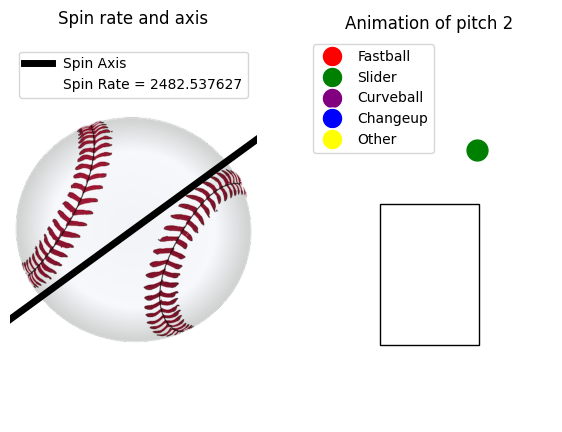

MovieWriter ffmpeg unavailable; using Pillow instead.


: 

In [1]:
import math
from tkinter import *
from dataclasses import dataclass
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib import image as mpimg
import matplotlib.patches as patches
from matplotlib.lines import Line2D


def create_strike_zone(ax, pitch_number):
    ax.set_title(f"Animation of pitch {pitch_number}")
    ax.set_xlim([-30, 30])
    ax.set_ylim([0, 120])
    rect = patches.Rectangle(
        (-12, 24), 24, 44, linewidth=1, edgecolor="black", facecolor="none"
    )
    plt.axis(False)
    ax.add_patch(rect)

    # create legend
    pitch_types = [
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Fastball",
            markerfacecolor="red",
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Slider",
            markerfacecolor="green",
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Curveball",
            markerfacecolor="purple",
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Changeup",
            markerfacecolor="blue",
            markersize=15,
        ),
        Line2D(
            [0],
            [0],
            marker="o",
            color="w",
            label="Other",
            markerfacecolor="yellow",
            markersize=15,
        ),
    ]
    plt.legend(handles=pitch_types)


def read_pitch_type():
    if bullpen_data.at[pitch_number, "TaggedPitchType"] == "Fastball":
        return "red"
    elif bullpen_data.at[pitch_number, "TaggedPitchType"] == "Slider":
        return "green"
    elif bullpen_data.at[pitch_number, "TaggedPitchType"] == "Curveball":
        return "purple"
    elif bullpen_data.at[pitch_number, "TaggedPitchType"] == "Changeup":
        return "blue"
    else:
        return "yellow"


def clear_frame():
    for widget in window.winfo_children():
        widget.destroy()


def pitch_number_button():
    global entry2, pitch_number
    pitch_number = int(entry2.get()) - 1
    clear_frame()
    global wait_var2
    wait_var2.set(1)
    clear_frame()


def read_csv_button():
    global entry1, entry2
    csv_name = entry1.get()
    global bullpen_data
    bullpen_data = pd.read_csv(csv_name)
    global wait_var
    wait_var.set(1)
    clear_frame()


def view_another_button():
    global wait_var3
    wait_var3.set(1)


def exit_button():
    global running
    window.destroy()
    running = False
    wait_var3.set(1)


# *****Start of main method*****
window = Tk()
window.geometry("800x800")
window.title("Bullpen Visualiation")

# Read csv file 09_08_2022 4_01_32 PM-Maryland@Maryland.csv
label1 = Label(window, text="Enter csv file name (including .csv)")
entry1 = Entry(window, width = 50)
read_csv = Button(window, text="Enter", command=read_csv_button)

label1.pack()
entry1.pack()
read_csv.pack()

wait_var = IntVar()
read_csv.wait_variable(wait_var)

running = True
while running:
    clear_frame()

    # get pitch number from user
    label2 = Label(window, text="Enter the pitch number to view.")
    entry2 = Entry(window)
    get_pitch_number = Button(window, text="Enter", command=pitch_number_button)

    label2.pack()
    entry2.pack()
    get_pitch_number.pack()

    wait_var2 = IntVar()
    get_pitch_number.wait_variable(wait_var2)

    if pitch_number >= len(bullpen_data) or pitch_number < 0:
        clear_frame()
        label = Label(window, text="Please enter a valid pitch number.")
        try_another = Button(
            window, text="Try another pitch", command=view_another_button
        )

        label.pack()
        try_another.pack()

        wait_var3 = IntVar()
        try_another.wait_variable(wait_var3)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 5))

        # create spin rate and axis visualization
        ax1.set_title("Spin rate and axis", x=0.5, y=1.3)
        ax1.set_xlim([-1, 1])
        ax1.set_ylim([-1, 1])
        ax1.axis("off")

        # read variables needed
        spin_rate = bullpen_data.at[pitch_number, "SpinRate"]
        spin_axis = bullpen_data.at[pitch_number, "SpinAxis"]
        if spin_axis != spin_axis or spin_rate != spin_rate:
            label = Label(
                window,
                text="Pitch does not contain necessary data. Please choose another pitch.",
            )
            try_another = Button(
                window, text="Try another pitch", command=view_another_button
            )
            
            label.pack()
            try_another.pack()

            wait_var3 = IntVar()
            try_another.wait_variable(wait_var3)
        else:
            # draw spin axis
            pi = math.pi
            adjusted_angle = 90 - (spin_axis % 90)
            radians = adjusted_angle * 2 * pi / 360
            slope = math.tan(radians)
            y_intcep = math.sin(radians) - (slope * math.cos(radians))
            ax1.axline(
                (0, 0), slope=slope, color="black", linewidth=5, label="Spin Axis"
            )

            # line doesnt appear, used to add spin rate to legend
            ax1.axline(
                (0, 0),
                slope=0,
                color="black",
                linewidth=0,
                label=f"Spin Rate = {spin_rate}",
            )
            image = plt.imread("baseball_image.png")
            ax1.imshow(image, extent=[-1, 1, -1, 1])
            ax1.legend(loc="upper center", bbox_to_anchor=(0.5, 1.25))

            # Create strike zone plot
            create_strike_zone(ax2, pitch_number + 1)

            # read variables needed for plot (all in inches)
            marker_color = read_pitch_type()
            final_loc_side = bullpen_data.at[pitch_number, "PlateLocSide"] * 12
            final_loc_height = bullpen_data.at[pitch_number, "PlateLocHeight"] * 12
            vert_break = bullpen_data.at[pitch_number, "VertBreak"]
            horz_break = bullpen_data.at[pitch_number, "HorzBreak"]
            if (
                final_loc_side != final_loc_side
                or final_loc_height != final_loc_height
                or vert_break != vert_break
                or horz_break != horz_break
            ):
                label = Label(
                    window,
                    text="Pitch does not contain necessary data. Please choose another pitch.",
                )
                try_another = Button(
                    window, text="Try another pitch", command=view_another_button
                )
                
                label.pack()
                try_another.pack()

                wait_var3 = IntVar()
                try_another.wait_variable(wait_var3)
            else:
                init_loc_side = final_loc_side - horz_break
                init_loc_height = final_loc_height - vert_break
                m = (final_loc_height - init_loc_height) / (
                    final_loc_side - init_loc_side
                )
                b = init_loc_height - (m * init_loc_side)
                x = np.linspace(init_loc_side, final_loc_side, 100)
                y = m * x + b

                # plot the chosen pitch in the strike zone based on "PlateLocSide" and "PlateLocHeight"
                (point,) = ax2.plot(
                    init_loc_side,
                    init_loc_height,
                    marker="o",
                    markersize=15,
                    color=marker_color,
                )

                def update(num, x, y, point):
                    point.set_data(x[num], y[num])
                    return (point,)

                plt.show()
                ani = animation.FuncAnimation(
                    fig, update, len(x), fargs=[x, y, point], interval=25, repeat=True
                )
                filename = "strike_zone_anim.gif"
                ani.save(filename)
                result = PhotoImage(file=filename)

                image_label = Label(window, image=result)
                exit = Button(window, text="Exit the program", command=exit_button)
                view_another = Button(
                    window, text="View another pitch", command=view_another_button
                )

                image_label.pack()
                exit.pack()
                view_another.pack()

                wait_var3 = IntVar()
                view_another.wait_variable(wait_var3)
window.mainloop()
